In [1]:
!pip install jcopdl
!pip install gdown

  Created wheel for jcopdl: filename=jcopdl-1.1.4-py2.py3-none-any.whl size=14136 sha256=a83004bc683d727683253cdcb93174998ec36cd584277adbb1acfb6b5ceab006
  Stored in directory: /root/.cache/pip/wheels/b7/bb/7e/598a9891885d4539d0713d760b0f3be8d760a33802f62f5d2e
Successfully built jcopdl


In [2]:
!gdown https://drive.google.com/uc?id=1aPgQGEWnekL4MwhfoQIUUs8m2cT1Coon

Downloading...
From: https://drive.google.com/uc?id=1aPgQGEWnekL4MwhfoQIUUs8m2cT1Coon
To: /content/panorama.zip
25.7MB [00:01, 15.0MB/s]


In [3]:
!unzip /content/panorama.zip

Archive:  /content/panorama.zip
   creating: data/
  inflating: data/test_label.csv     
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
   creating: data/test/
  inflating: data/test/1409.jpg      
   creating: __MACOSX/data/test/
  inflating: __MACOSX/data/test/._1409.jpg  
  inflating: data/test/1347.jpg      
  inflating: __MACOSX/data/test/._1347.jpg  
  inflating: data/test/1145.jpg      
  inflating: __MACOSX/data/test/._1145.jpg  
  inflating: data/test/360.jpg       
  inflating: __MACOSX/data/test/._360.jpg  
  inflating: data/test/1192.jpg      
  inflating: __MACOSX/data/test/._1192.jpg  
  inflating: data/test/374.jpg       
  inflating: __MACOSX/data/test/._374.jpg  
  inflating: data/test/1964.jpg      
  inflating: __MACOSX/data/test/._1964.jpg  
  inflating: data/test/1958.jpg      
  inflating: __MACOSX/data/test/._1958.jpg  
  inflating: data/test/572.jpg       
  inflating: __MACOSX/da

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

# Dataset & Dataloader

In [0]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from jcopdl.utils.dataloader import MultilabelDataset

In [0]:
bs = 64
crop_size = 224

train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(crop_size, scale=(0.7, 1)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])

test_transform = transforms.Compose([
    transforms.Resize(230),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_set = MultilabelDataset("/content/data/train_label.csv", "/content/data/train/", transform=train_transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=4)

test_set = MultilabelDataset("/content/data/test_label.csv", "/content/data/test/", transform=test_transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

In [7]:
label2cat = train_set.classes
label2cat

['desert', 'mountains', 'sea', 'sunset', 'trees']

# Arsitektur

In [8]:
from torchvision.models import mobilenet_v2

mnet = mobilenet_v2(pretrained=True)

for param in mnet.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/checkpoints/mobilenet_v2-b0353104.pth


In [9]:
mnet

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

# Custom Arsitektur

In [0]:
mnet.Classifier = nn.Sequential(
    nn.Linear(1280, 5),
    nn.Sigmoid()
)

In [11]:
mnet

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [0]:
class CustomMonetv2(nn.Module):
    def __init__(self, output_size):
        super().__init__()
        self.mnet = mobilenet_v2(pretrained=True)
        self.freeze()
        self.mnet.classifier = nn.Sequential(
            nn.Linear(1280, output_size),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.mnet(x)
    
    def freeze(self):
        for param in self.mnet.parameters():
            param.requires_grad = False
    
    def unfreeze(self):
        for param in self.mnet.parameters():
            param.requires_grad = True

# Config

In [0]:
config = set_config({
    "output_size": len(train_set.classes),
    "batch_size": bs,
    "crop_size": crop_size
})

# Pretraining: Adaptation

In [0]:
model = CustomMonetv2(config.output_size).to(device)
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, early_stop_patience=2, outdir="model")

In [0]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = 0
    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
    cost = cost / len(dataset)
    return cost



Epoch     1
Train_cost  = 0.5040 | Test_cost  = 0.3939 | 




Epoch     2
Train_cost  = 0.3570 | Test_cost  = 0.3173 | 




Epoch     3
Train_cost  = 0.3080 | Test_cost  = 0.2824 | 




Epoch     4
Train_cost  = 0.2762 | Test_cost  = 0.2660 | 




Epoch     5
Train_cost  = 0.2592 | Test_cost  = 0.2570 | 




Epoch     6
Train_cost  = 0.2551 | Test_cost  = 0.2531 | 




Epoch     7
Train_cost  = 0.2525 | Test_cost  = 0.2497 | 




Epoch     8
Train_cost  = 0.2346 | Test_cost  = 0.2304 | 




Epoch     9
Train_cost  = 0.2265 | Test_cost  = 0.2290 | 




Epoch    10
Train_cost  = 0.2190 | Test_cost  = 0.2356 | 
==> EarlyStop patience =  1 | Best test_cost: 0.2290




Epoch    11
Train_cost  = 0.2258 | Test_cost  = 0.2407 | 
==> EarlyStop patience =  2 | Best test_cost: 0.2290
==> Execute Early Stopping at epoch: 11 | Best test_cost: 0.2290
==> Best model is saved at model


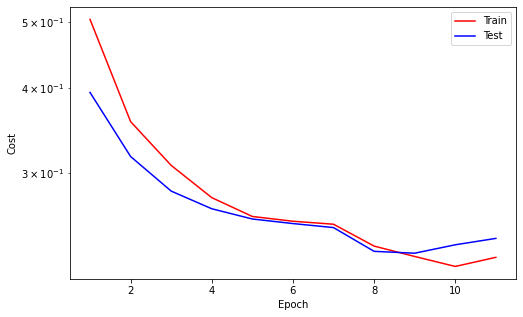

In [16]:
while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break

# Fine-Tuning

In [0]:
model.unfreeze()
optimizer = optim.AdamW(model.parameters(), lr=1e-5)

callback.reset_early_stop()
callback.early_stop_patience = 5



Epoch    15
Train_cost  = 0.1979 | Test_cost  = 0.2007 | 




Epoch    16
Train_cost  = 0.1831 | Test_cost  = 0.1922 | 




Epoch    17
Train_cost  = 0.1687 | Test_cost  = 0.1903 | 




Epoch    18
Train_cost  = 0.1617 | Test_cost  = 0.1858 | 




Epoch    19
Train_cost  = 0.1549 | Test_cost  = 0.1813 | 




Epoch    20
Train_cost  = 0.1463 | Test_cost  = 0.1816 | 


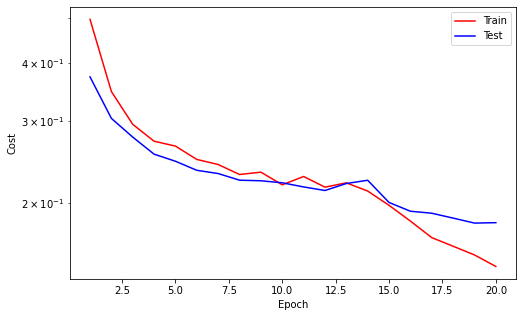

==> EarlyStop patience =  1 | Best test_cost: 0.1813




Epoch    21
Train_cost  = 0.1415 | Test_cost  = 0.1776 | 




Epoch    22
Train_cost  = 0.1399 | Test_cost  = 0.1731 | 




Epoch    23
Train_cost  = 0.1350 | Test_cost  = 0.1725 | 




Epoch    24
Train_cost  = 0.1308 | Test_cost  = 0.1782 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1725




Epoch    25
Train_cost  = 0.1232 | Test_cost  = 0.1706 | 




Epoch    26
Train_cost  = 0.1227 | Test_cost  = 0.1661 | 




Epoch    27
Train_cost  = 0.1147 | Test_cost  = 0.1648 | 




Epoch    28
Train_cost  = 0.1122 | Test_cost  = 0.1624 | 




Epoch    29
Train_cost  = 0.1135 | Test_cost  = 0.1628 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1624




Epoch    30
Train_cost  = 0.1067 | Test_cost  = 0.1794 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1624




Epoch    31
Train_cost  = 0.1037 | Test_cost  = 0.1594 | 




Epoch    32
Train_cost  = 0.0979 | Test_cost  = 0.1597 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1594




Epoch    33
Train_cost  = 0.0934 | Test_cost  = 0.1601 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1594




Epoch    34
Train_cost  = 0.0935 | Test_cost  = 0.1654 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1594




Epoch    35
Train_cost  = 0.0943 | Test_cost  = 0.1592 | 




Epoch    36
Train_cost  = 0.0855 | Test_cost  = 0.1620 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1592




Epoch    37
Train_cost  = 0.0830 | Test_cost  = 0.1534 | 




Epoch    38
Train_cost  = 0.0797 | Test_cost  = 0.1633 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1534




Epoch    39
Train_cost  = 0.0835 | Test_cost  = 0.1503 | 




Epoch    40
Train_cost  = 0.0762 | Test_cost  = 0.1569 | 


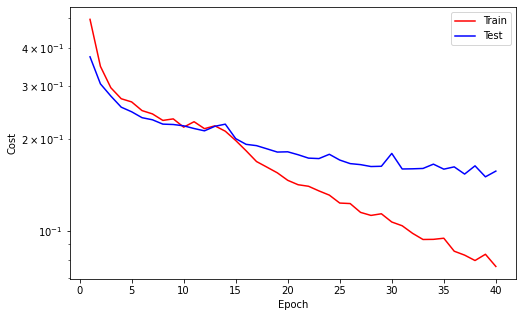

==> EarlyStop patience =  1 | Best test_cost: 0.1503




Epoch    41
Train_cost  = 0.0796 | Test_cost  = 0.1539 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1503




Epoch    42
Train_cost  = 0.0726 | Test_cost  = 0.1520 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1503




Epoch    43
Train_cost  = 0.0762 | Test_cost  = 0.1552 | 
==> EarlyStop patience =  4 | Best test_cost: 0.1503




Epoch    44
Train_cost  = 0.0739 | Test_cost  = 0.1541 | 
==> EarlyStop patience =  5 | Best test_cost: 0.1503
==> Execute Early Stopping at epoch: 44 | Best test_cost: 0.1503
==> Best model is saved at model


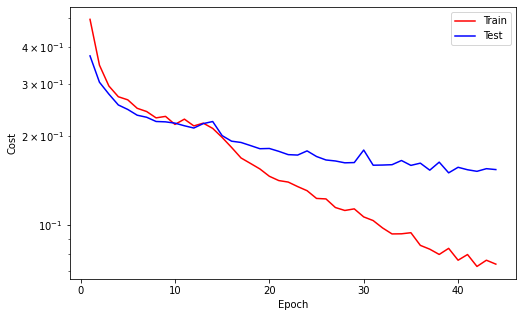

In [0]:
while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break

# Predict

In [0]:
feature, target = next(iter(testloader))
feature, target = feature.to(device), target.to(device)

In [0]:
with torch.no_grad():
    model.eval()
    output = model(feature)
    preds = (output > 0.5).to(torch.float32)
preds

tensor([[0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 1., 0.],
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 1.],
        [0., 1., 0., 0., 1.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 1., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0

# Sanity Check

In [36]:
feature, target = next(iter(testloader))
feature, target = feature.to(device), target.to(device)
feature.shape, target.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64, 5]))

In [0]:
with torch.no_grad():
  output = model(feature)
  preds = output > 0.5

In [0]:
def convert_to_label(x):
    return [label for pred, label in zip(x, label2cat) if pred==1]

def inverse_norm(img):
    img[0, :, :] = img[0, :, :] * 0.229 + 0.485
    img[1, :, :] = img[1, :, :] * 0.224 + 0.456
    img[2, :, :] = img[2, :, :] * 0.225 + 0.406
    return img

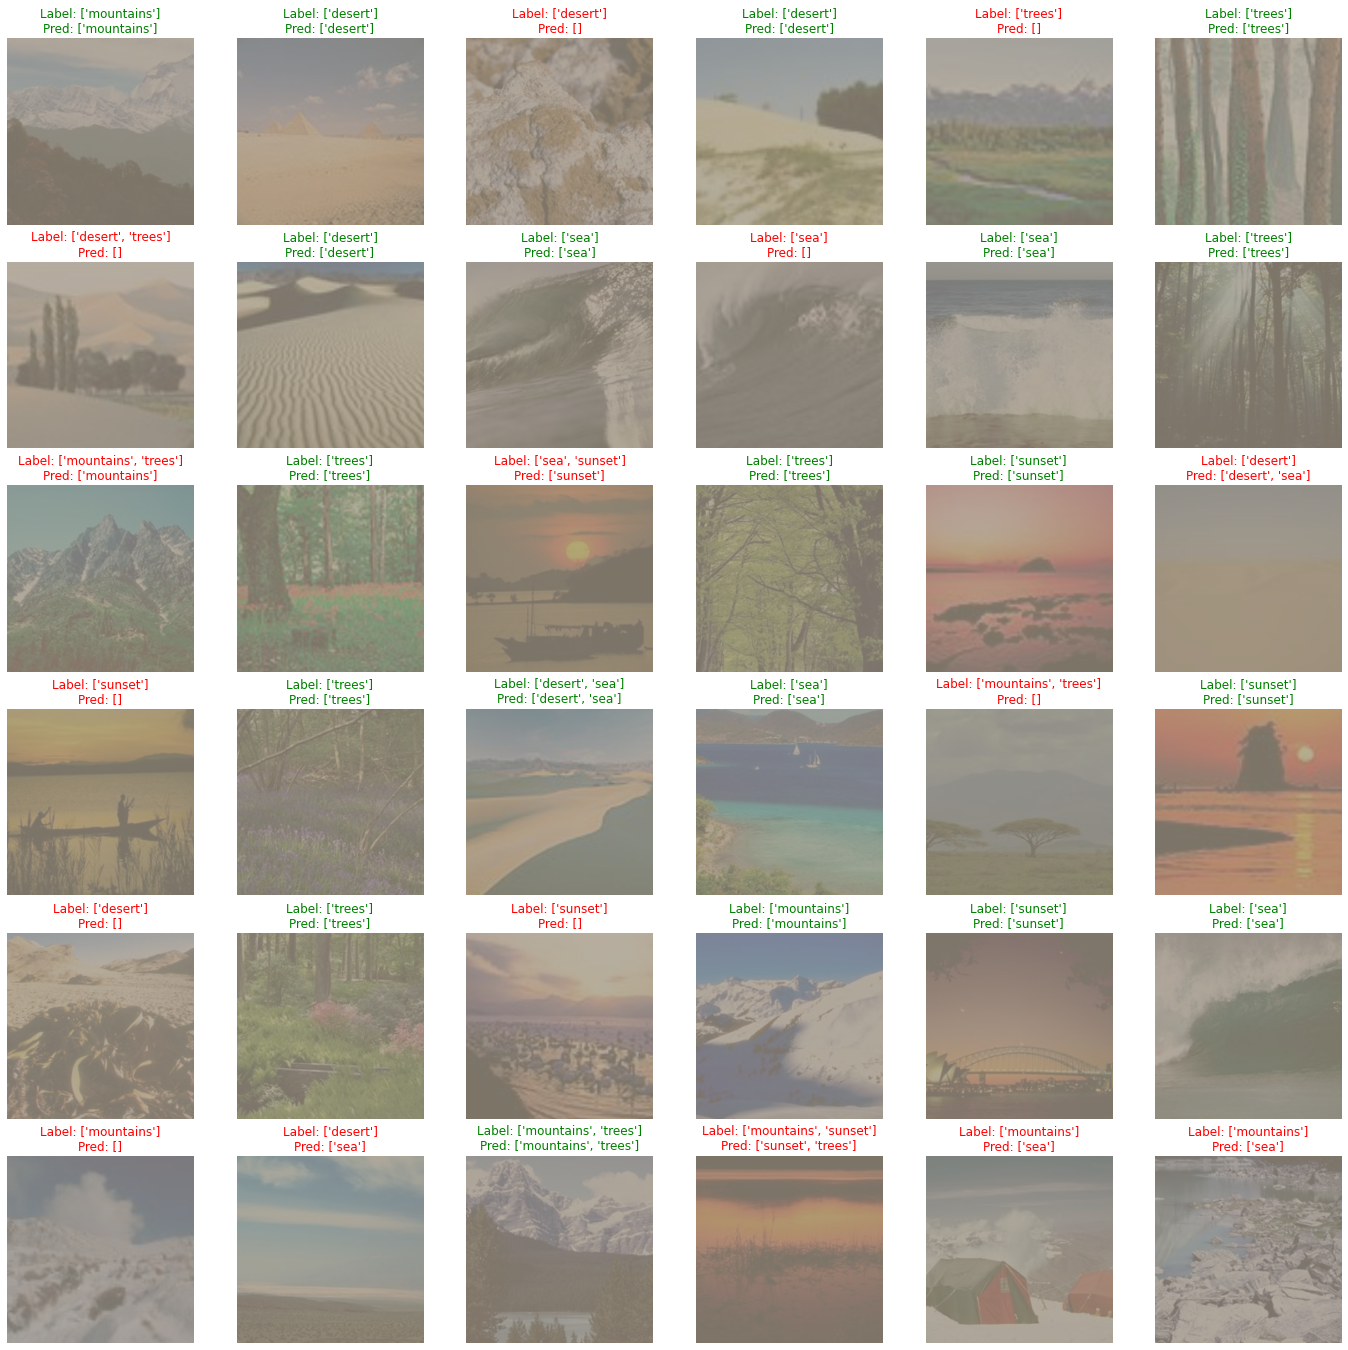

In [40]:
fig, axes = plt.subplots(6, 6, figsize=(24,24))
for img, label, pred, ax in zip(feature, target, preds, axes.flatten()):
    ax.imshow(inverse_norm(img).permute(1, 2, 0).cpu())
    font = {"color": "r"} if (pred != label).any() else {"color": "g"}
    label, pred = convert_to_label(label), convert_to_label(pred)
    ax.set_title(f"Label: {label}\nPred: {pred}", fontdict=font);
    ax.axis('off');

In [0]:
!zip -r model.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/configs.pth (deflated 13%)
  adding: content/model/logs.pth (deflated 8%)
  adding: content/model/weights_best.pth (deflated 8%)
